In [1]:
# To display full output in Notebook, instead of only the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Please make sure Jupyter Notebook environment is running a Python 3 kernel 
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."
%autosave 120
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #plotting graphs 
import seaborn as sns # used for plot interactive graph.
from scipy import stats
# statistical analysis

Autosaving every 120 seconds


## TOC:
* [January](#jan)
* [February](#feb)
* [March](#mar)
* [First Quarter](#fqa)

* [April](#apr)
* [May](#may)
* [June](#jun)
* [Second Quarter](#sqa)

* [July](#jul)
* [August](#aug)
* [September](#sep)
* [Third Quarter](#tqa)

In [3]:
df_inputs = pd.read_csv('fscData/fscDataInputsCleaned.csv')
df_agg = pd.read_csv('fscData/fscDataAggCleaned.csv')
df_fin = pd.read_csv('fscData/fscDataFinCleaned.csv')
df_mech = pd.read_csv('fscData/fscDataMechCleaned.csv')
df_ind = pd.read_csv('fscData/fscDataIndivCleaned.csv')

In [4]:
df_inputs.head()
df_agg.head()
df_fin.head()
df_mech.head()
df_ind.head()

,County,Month,Week,fscName,inputName,Category,Type,companyInvolved,unit,Quantity,Value,Commision Earned
0,Tharaka Nithi,1,2,Magdalene Kiarie,Profen,Crop protection,Pest and desease control,Agrichem Africa Limited,Mls,100,600,0
1,Tharaka Nithi,1,2,Magdalene Kiarie,Booster,Crop Nutrition,Foliar,Agrosolutions Ltd,Mls,750,950,0
2,Meru,1,2,Solomon Muthee,Apical root cuttings,Seeds,Seeds,Apical Root Cuttings,Pieces,100,1000,0
3,Tharaka Nithi,1,2,Magdalene Kiarie,Herbistar,Crop protection,Herbicide,Gov PL,Mls,200,2200,0
4,Tharaka Nithi,1,2,Magdalene Kiarie,Escort,Crop protection,Pest and desease control,Greenlife,Mls,600,3850,0


,County,Month,Week,fscName,crop,kgAgg,kgSold,Sold MT,buyerName,unitPrice,Value,Commission Earned,Number of Male farmers who sold,Number of Female farmers who sold,Total
0,Nakuru,8,1,MIKE TESOT,Potatoes,11250,11250,11.25,Joel Tum,21.0,236250,7500,2,0,2
1,Nakuru,8,1,MIKE TESOT,Potatoes,25500,25500,25.50,Joel Tum,21.0,535500,"17,000",3,2,5
2,Nakuru,8,1,ALEX MACHARIA,Potatoes,37500,37500,37.50,David Murosi,21.0,787500,25000,4,1,5
3,Nakuru,8,1,ALEX MACHARIA,Potatoes,22500,22500,22.50,JOSEPH WAMBUGU,20.0,450000,"15,000",1,2,3
4,Nakuru,8,1,ALEX MACHARIA,Potatoes,15000,15000,15.00,JOSEPH WAMBUGU,21.0,315000,10000,1,2,3


,County,Month,Week,fscName,finGroup,newLoans,newLoanValue,farmersRepaid,Commision Earned
0,Meru,1,4,Isabella Paul,Sunculture,4,625000,19,18430
1,Nakuru,2,3,Collins Rotich,Vision Fund,16,"73,600",16,0
2,Kakamega,2,4,Benjamin Wanguba,OAF,11,54564,11,0
3,Meru,2,4,Mark Mwendia,Credit Factory,4,46000,4,440
4,Nakuru,2,4,Lily Cherotich,Mokuns Sacco,20,"100,000",0,0


,County,Month,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Value,Commision Earned,Male,Female,Total
0,Busia,1,1,Marlone Awillie,Moses Wejulu,Mechanisation,Ploughing,21.0,58800,2100,3,2,5.0
1,Busia,1,2,Amos Magero,Peter Wanga,Mechanisation,Ploughing,13.0,36400,1300,2,2,4.0
2,Busia,1,2,Florence Nabwire,Michael ochieng,Mechanisation,Ploughing,8.0,22400,800,1,3,4.0
3,Busia,1,2,Elder Mariamu Omurayi,Trix Magoba,Mechanisation,Ploughing,3.0,7500,300,3,0,3.0
4,Busia,1,2,Shadrack Okuku,Trix Magoba,Mechanisation,Ploughing,1.0,2800,100,1,0,1.0


,name,County,input_value,input_comm,mech_value,mech_comm,agg_total,agg_comm,fin_value,fin_comm,grand_total,grand_total_commission
0,Godfrey Mwongora,Meru,"5,405,652","79,100","29,000",0,"88,979,000","371,000","141,000",0,"94,554,652","450,100"
1,Solomon Muthee,Meru,"71,215","6,885",0,0,"59,226,247","2,627,252","395,000","1,000","59,692,462","2,635,137"
2,Abraham Nganga,Nyandarua,"14,337,110","2,298,138","675,500","73,700","23,418,994","1,047,325","300,000",0,"38,731,604","3,419,163"
3,Lily Cherotich,Nakuru,"2,467,250","116,604","30,000","2,400","35,886,300","2,036,750","100,000",0,"38,483,550","2,155,754"
4,Everest Ogembo,Migori,"75,650","2,040",0,0,"29,866,098","72,536",0,0,"29,941,748","74,576"


In [5]:
common = set.intersection(set(df_inputs.fscName), set(df_agg.fscName), set(df_mech.fscName), set(df_fin.fscName))
print(common)

set()


In [6]:
#pd.concat([
  #  df1[df1.Col1.isin(common)],
   # df2[df2.Col1.isin(common)],
    #df3[df3.Col1.isin(common)]]).sort_values(by='Col1')

In [7]:
df_fin.sort_values(by=['Commision Earned','Month'])

,County,Month,Week,fscName,finGroup,newLoans,newLoanValue,farmersRepaid,Commision Earned
1,Nakuru,2,3,Collins Rotich,Vision Fund,16,"73,600",16,0
2,Kakamega,2,4,Benjamin Wanguba,OAF,11,54564,11,0
4,Nakuru,2,4,Lily Cherotich,Mokuns Sacco,20,"100,000",0,0
7,Kakamega,3,2,Benjamin Wanguba,OAF,30,236136,30,0
10,Kakamega,3,4,Lawrence Mukabane,CG Sacco,1,150000,1,0
...,...,...,...,...,...,...,...,...,...
3,Meru,2,4,Mark Mwendia,Credit Factory,4,46000,4,440
22,Homabay,4,2,Millicent Wanjare,Elena Agspace (Aggregator),1,68600,1,4400
48,Nakuru,9,1,Alex Macharia,Agri Wallet,34,"102,000",34,"6,800"
42,Nakuru,6,4,Alex Macharia,Agri Wallet,20,"60,000",20,8000


In [8]:
#replace_values = {'-':np.nan}
#df_mech['Commision Earned'] = df_mech['Commision Earned'].replace(replace_values)
#df_mech.sort_values(by=['Commision Earned','Month'])
#df_mech.isnull().sum()
#df_mech = df_mech.dropna()
#df_mech

In [9]:
com_mth = df_fin.sort_values(['Commision Earned'], ascending=False)

In [10]:
com_mth.info()
com_mth = com_mth[['Month','Week','fscName', 'Commision Earned']]
com_mth['Commision Earned'] = (com_mth['Commision Earned'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
com_mth.astype({'Commision Earned': 'float64'}).dtypes
com_mth

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 17 to 65
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   County            66 non-null     object
 1   Month             66 non-null     int64 
 2   Week              66 non-null     int64 
 3   fscName           66 non-null     object
 4   finGroup          66 non-null     object
 5   newLoans          66 non-null     int64 
 6   newLoanValue      66 non-null     object
 7   farmersRepaid     66 non-null     int64 
 8   Commision Earned  66 non-null     object
dtypes: int64(4), object(5)
memory usage: 5.2+ KB


Month                 int64
Week                  int64
fscName              object
Commision Earned    float64
dtype: object

,Month,Week,fscName,Commision Earned
17,4,1,Joseph Koyo,960.0
42,6,4,Alex Macharia,8000.0
48,9,1,Alex Macharia,6800.0
22,4,2,Millicent Wanjare,4400.0
3,2,4,Mark Mwendia,440.0
...,...,...,...,...
35,5,3,Monica Achieng,0.0
36,5,3,Rose Ndolo,0.0
37,5,3,Hagai Nido,0.0
38,5,3,Andrew Oywa,0.0


# JANUARY <a class="anchor" id="jan"></a>

In [11]:
import warnings

,Week,fscName,Commision Earned
0,4,Isabella Paul,18430.0


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned
0,4,Isabella Paul,18430.0


,Week,fscName,Commision Earned


nan

nan

18430.0

nan

,Week,Average Commission
0,1,NaN
1,2,NaN
2,3,NaN
3,4,18430.0
4,5,NaN


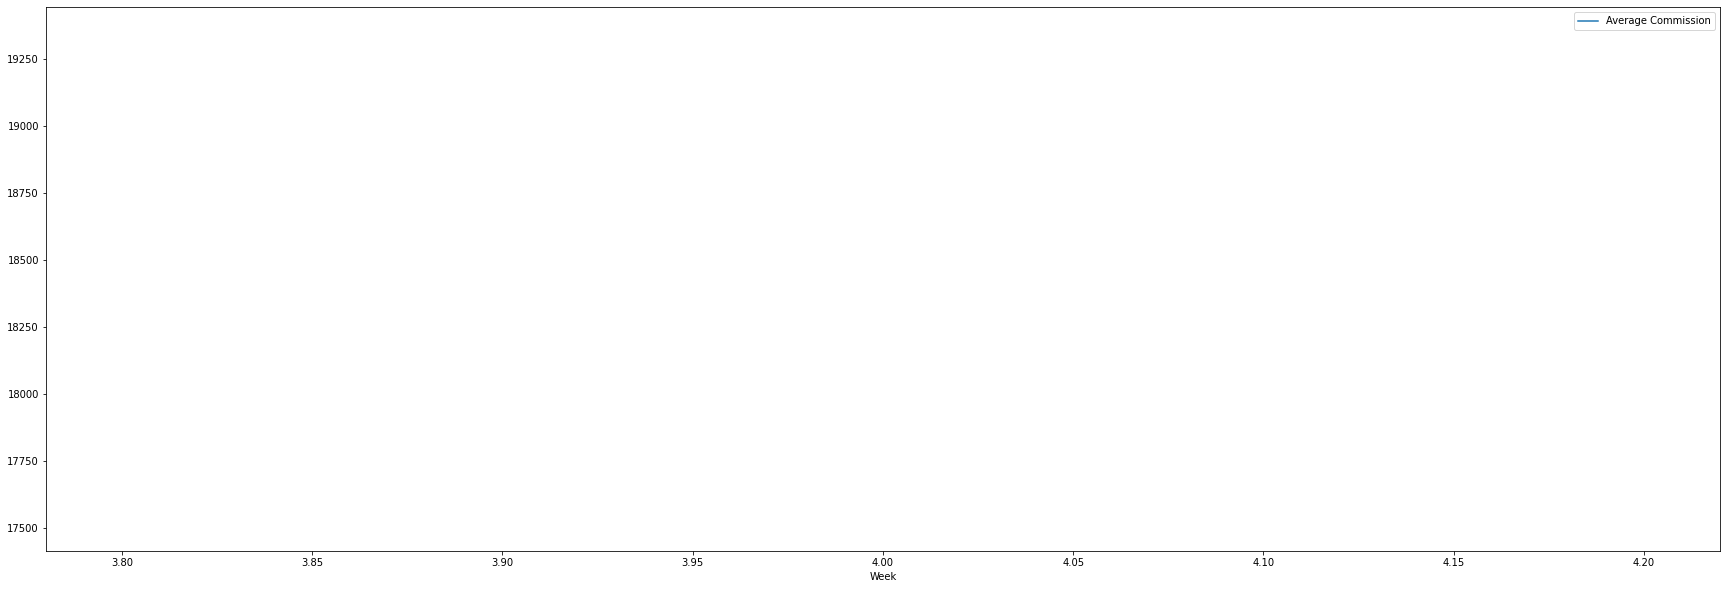

In [12]:
warnings.simplefilter(action='ignore', category=FutureWarning)

#getting the values for specific months
com_jan = com_mth[com_mth['Month']==1]
com_jan = com_jan.sort_values(by='Week')
com_jan = com_jan.drop(columns=['Month'])
com_jan

#getting the values for each week
wk1 = com_jan[com_jan['Week']==1]
wk1

wk2 = com_jan[com_jan['Week']==2]
wk2

wk3 = com_jan[com_jan['Week']==3]
wk3 

wk4 = com_jan[com_jan['Week']==4]
wk4

wk5 = com_jan[com_jan['Week']==5]
wk5
#comm_graph = commission_monthly.plot.bar(x='Month', y='Commision Earned', figsize=(30,10))


#getting the average for each week, putting it into a line graph to see a trendline
wk2['Commision Earned'].mean()
wk3['Commision Earned'].mean()
wk4['Commision Earned'].mean()
wk5['Commision Earned'].mean()

d = {'Week': [1, 2, 3, 4, 5], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

janAvgComm = pd.DataFrame(data=d)
janAvgComm
janAvg_graph = janAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# FEBRUARY <a class="anchor" id="feb"></a>

,Week,fscName,Commision Earned
1,3,Collins Rotich,0.0
3,4,Mark Mwendia,440.0
2,4,Benjamin Wanguba,0.0
4,4,Lily Cherotich,0.0


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned
1,3,Collins Rotich,0.0


,Week,fscName,Commision Earned
3,4,Mark Mwendia,440.0
2,4,Benjamin Wanguba,0.0
4,4,Lily Cherotich,0.0


,Week,Average Commission
0,6,NaN
1,7,NaN
2,8,0.000000
3,9,146.666667


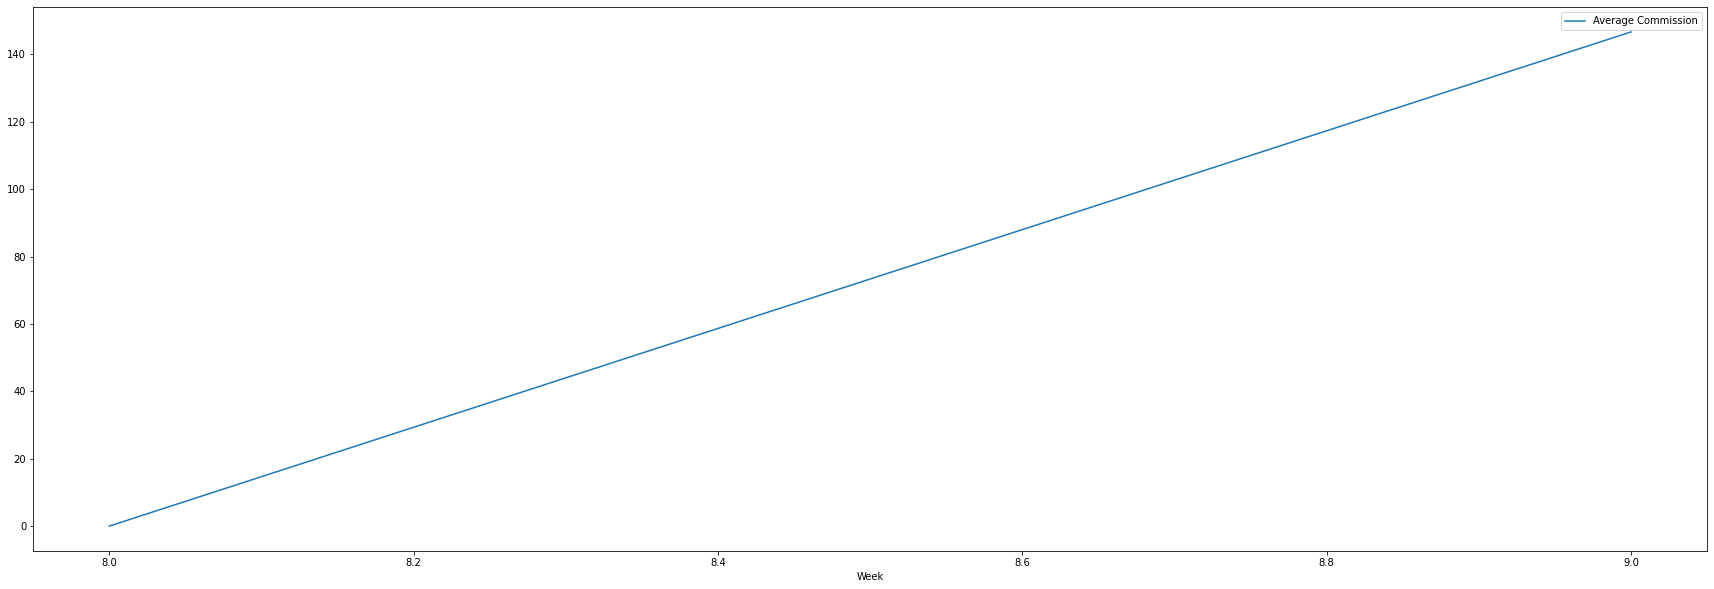

In [13]:
#getting the values for specific months
com_feb = com_mth[com_mth['Month']==2]
com_feb = com_feb.sort_values(by='Week')
com_feb = com_feb.drop(columns=['Month'])
com_feb

#getting the values for each week
wk1 = com_feb[com_feb['Week']==1]
wk1

wk2 = com_feb[com_feb['Week']==2]
wk2

wk3 = com_feb[com_feb['Week']==3]
wk3 

wk4 = com_feb[com_feb['Week']==4]
wk4


d = {'Week': [6, 7, 8, 9], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

febAvgComm = pd.DataFrame(data=d)
febAvgComm
febAvg_graph = febAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# MARCH <a class="anchor" id="mar"></a>

,Week,fscName,Commision Earned
5,1,Agnes Kathure,2910.0
8,2,Agnes Kathure,2910.0
6,2,Solomon Muthee,1000.0
7,2,Benjamin Wanguba,0.0
9,3,Mark Mwendia,1000.0
12,4,Mark Mwendia,2600.0
10,4,Lawrence Mukabane,0.0
11,4,Judith Akinyi,0.0


,Week,fscName,Commision Earned
5,1,Agnes Kathure,2910.0


,Week,fscName,Commision Earned
8,2,Agnes Kathure,2910.0
6,2,Solomon Muthee,1000.0
7,2,Benjamin Wanguba,0.0


,Week,fscName,Commision Earned
9,3,Mark Mwendia,1000.0


,Week,fscName,Commision Earned
12,4,Mark Mwendia,2600.0
10,4,Lawrence Mukabane,0.0
11,4,Judith Akinyi,0.0


,Week,Average Commission
0,10,2910.000000
1,11,1303.333333
2,12,1000.000000
3,13,866.666667


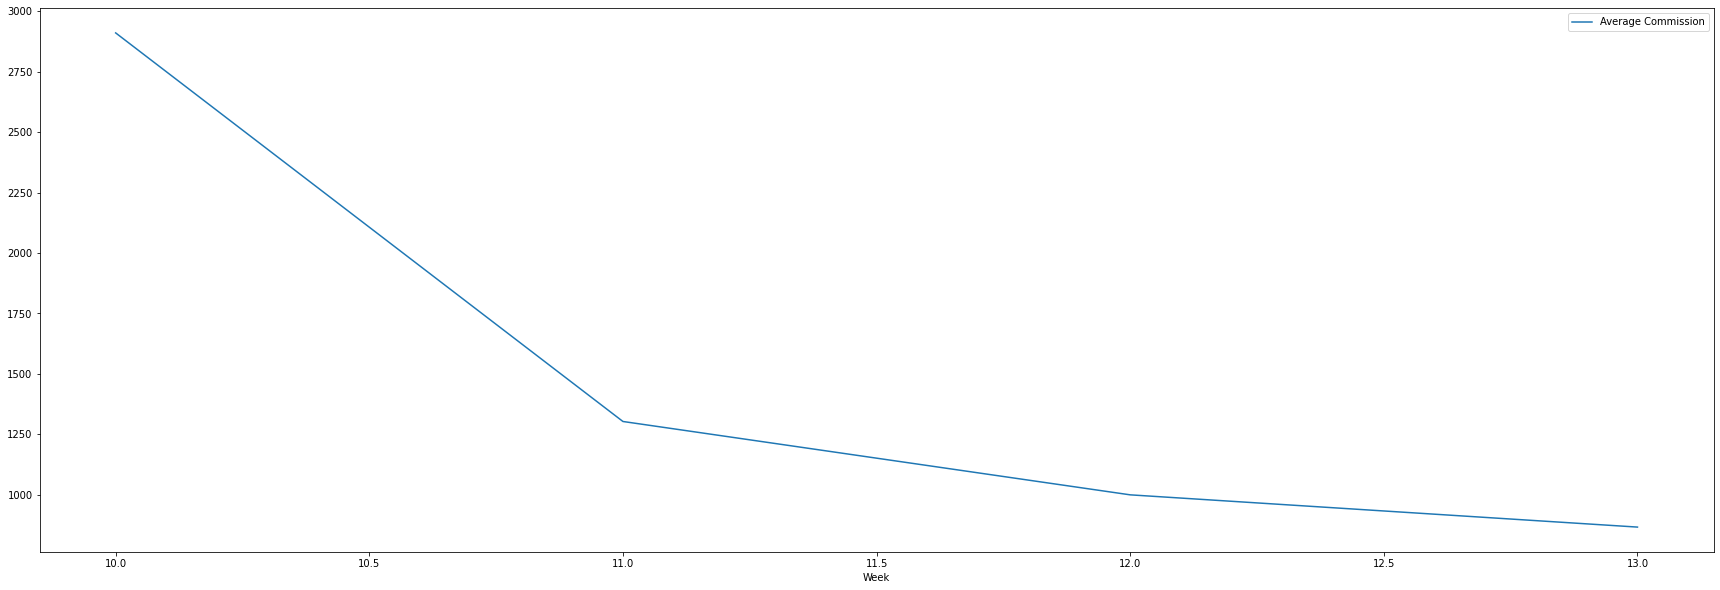

In [14]:
#getting the values for specific months
com_mar = com_mth[com_mth['Month']==3]
com_mar = com_mar.sort_values(by='Week')
com_mar = com_mar.drop(columns=['Month'])
com_mar

#getting the values for each week
wk1 = com_mar[com_mar['Week']==1]
wk1

wk2 = com_mar[com_mar['Week']==2]
wk2

wk3 = com_mar[com_mar['Week']==3]
wk3 

wk4 = com_mar[com_mar['Week']==4]
wk4

d = {'Week': [10, 11, 12, 13], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

marAvgComm = pd.DataFrame(data=d)
marAvgComm
marAvg_graph = marAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# FIRST QUARTER AVERAGE  <a class="anchor" id="fqa"></a>

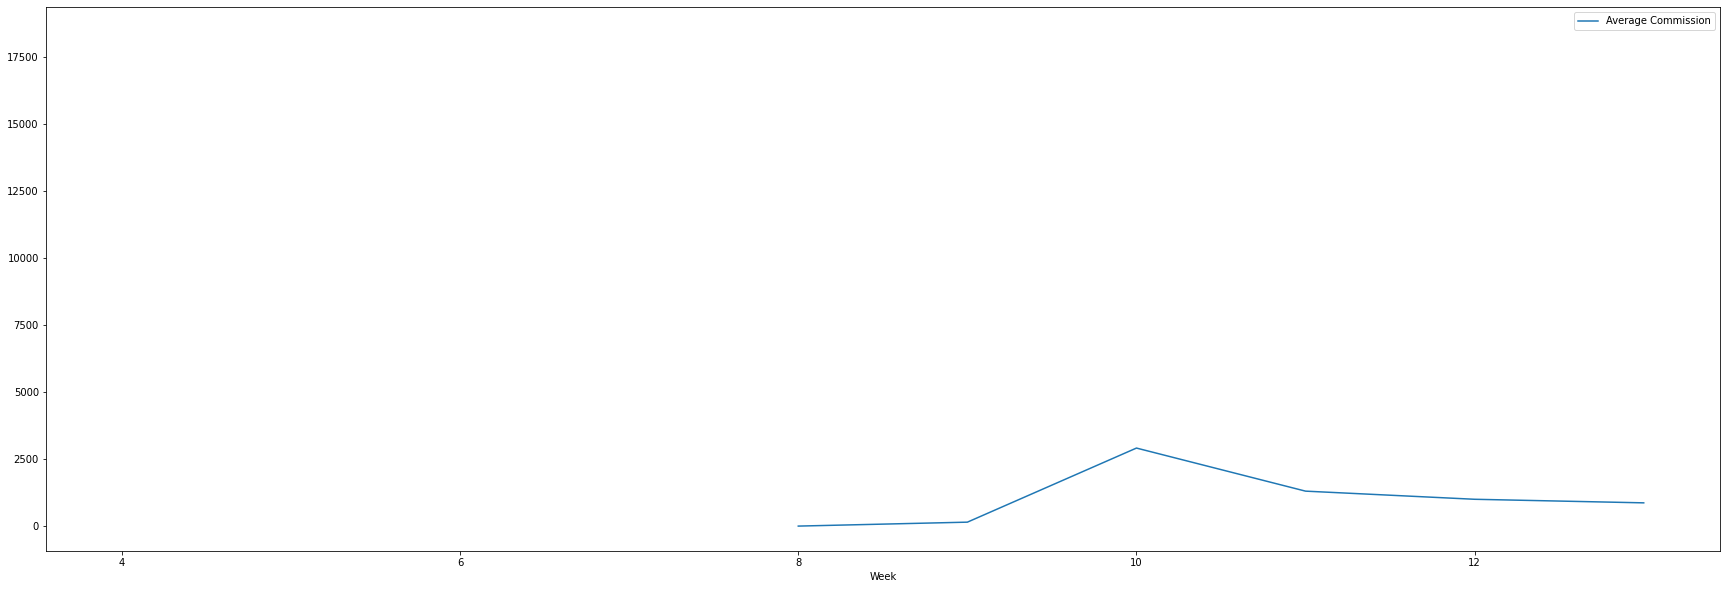

In [15]:
firstQuarter = [janAvgComm, febAvgComm, marAvgComm]

firstQ = pd.concat(firstQuarter)

firstQgraph = firstQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))


# APRIL <a class="anchor" id="apr"></a>

,Week,fscName,Commision Earned
17,1,Joseph Koyo,960.0
22,2,Millicent Wanjare,4400.0
14,1,Nicholas Owiti,4080.0
19,2,Paul Mao,2400.0
13,1,Lazarus Owade,240.0
23,2,Joseph Nyalando,1440.0
16,1,Lazarus Owade,1440.0
18,1,Joseph Odwar,1420.0
24,3,Gitonga Lawrence,1400.0
33,4,John Nyamburi,0.0


,Week,fscName,Commision Earned
17,1,Joseph Koyo,960.0
14,1,Nicholas Owiti,4080.0
13,1,Lazarus Owade,240.0
16,1,Lazarus Owade,1440.0
18,1,Joseph Odwar,1420.0
15,1,Rose Ndolo,0.0


,Week,fscName,Commision Earned
22,2,Millicent Wanjare,4400.0
19,2,Paul Mao,2400.0
23,2,Joseph Nyalando,1440.0
20,2,Rosalid Kathure,0.0
21,2,Dominic Okungu,0.0


,Week,fscName,Commision Earned
24,3,Gitonga Lawrence,1400.0


,Week,fscName,Commision Earned
33,4,John Nyamburi,0.0
27,4,Jacinta Adhaya Ochieng,0.0
25,4,Ayub Owiti,0.0
26,4,Washington Obiero,0.0
28,4,Julius Oker,0.0
29,4,Kephers Ogola,0.0
30,4,David Okombo,0.0
31,4,Elphas Owiti,0.0
32,4,Rolly Achieng Otieno,0.0


,Week,fscName,Commision Earned
34,5,Mark Mwendia,0.0


,Week,Average Commission
0,14,1356.666667
1,15,1648.000000
2,16,1400.000000
3,17,0.000000
4,18,0.000000


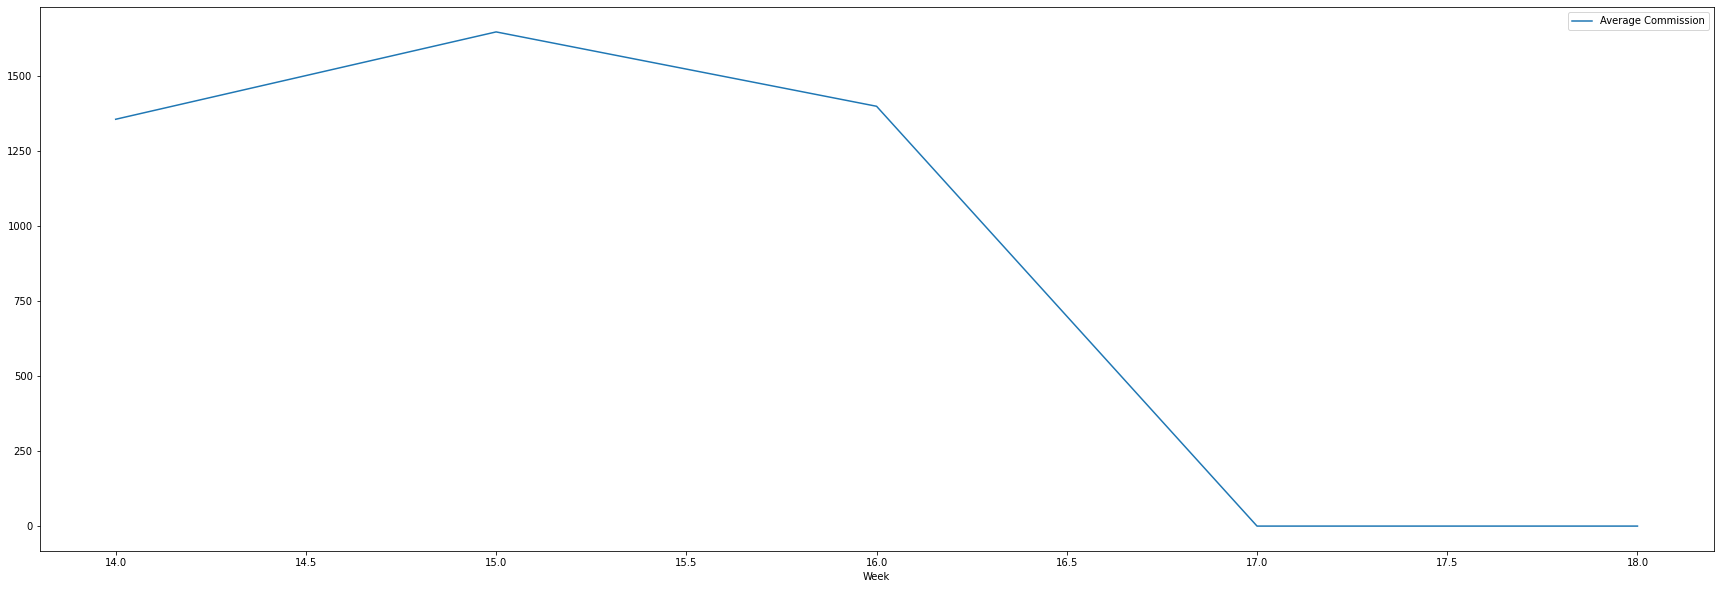

In [16]:
#getting the values for specific months
com_apr = com_mth[com_mth['Month']==4]
com_apr = com_apr.drop(columns=['Month'])
com_apr

#getting the values for each week
wk1 = com_apr[com_apr['Week']==1]
wk1

wk2 = com_apr[com_apr['Week']==2]
wk2

wk3 = com_apr[com_apr['Week']==3]
wk3 

wk4 = com_apr[com_apr['Week']==4]
wk4

wk5 = com_apr[com_apr['Week']==5]
wk5

d = {'Week': [14, 15, 16, 17, 18], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

aprAvgComm = pd.DataFrame(data=d)
aprAvgComm
aprAvg_graph = aprAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# MAY <a class="anchor" id="may"></a>

,Week,fscName,Commision Earned
39,3,Everlyne Awendo,0.0
35,3,Monica Achieng,0.0
36,3,Rose Ndolo,0.0
37,3,Hagai Nido,0.0
38,3,Andrew Oywa,0.0


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned
39,3,Everlyne Awendo,0.0
35,3,Monica Achieng,0.0
36,3,Rose Ndolo,0.0
37,3,Hagai Nido,0.0
38,3,Andrew Oywa,0.0


,Week,fscName,Commision Earned


,Week,Average Commission
0,19,NaN
1,20,NaN
2,21,0.0
3,22,NaN


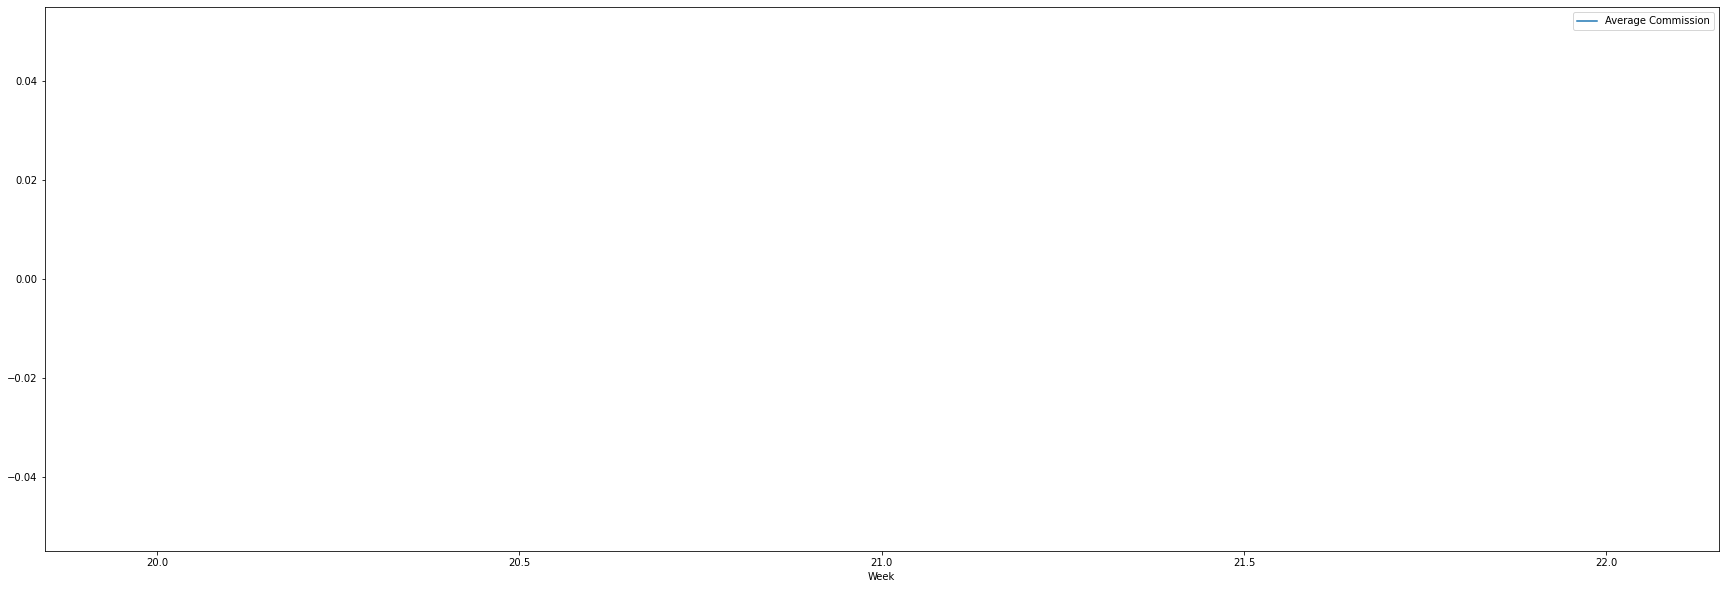

In [17]:
#getting the values for specific months
com_may = com_mth[com_mth['Month']==5]
com_may = com_may.sort_values(by='Week')
com_may = com_may.drop(columns=['Month'])
com_may

#getting the values for each week
wk1 = com_may[com_may['Week']==1]
wk1

wk2 = com_may[com_may['Week']==2]
wk2

wk3 = com_may[com_may['Week']==3]
wk3 

wk4 = com_may[com_may['Week']==4]
wk4

d = {'Week': [19, 20, 21, 22], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

mayAvgComm = pd.DataFrame(data=d)
mayAvgComm
mayAvg_graph = mayAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# JUNE <a class="anchor" id="jun"></a>

,Week,fscName,Commision Earned
41,1,Roseline Syama,0.0
40,1,None,0.0
42,4,Alex Macharia,8000.0


,Week,fscName,Commision Earned
41,1,Roseline Syama,0.0
40,1,None,0.0


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned
42,4,Alex Macharia,8000.0


,Week,Average Commission
0,23,0.0
1,24,NaN
2,25,NaN
3,26,8000.0


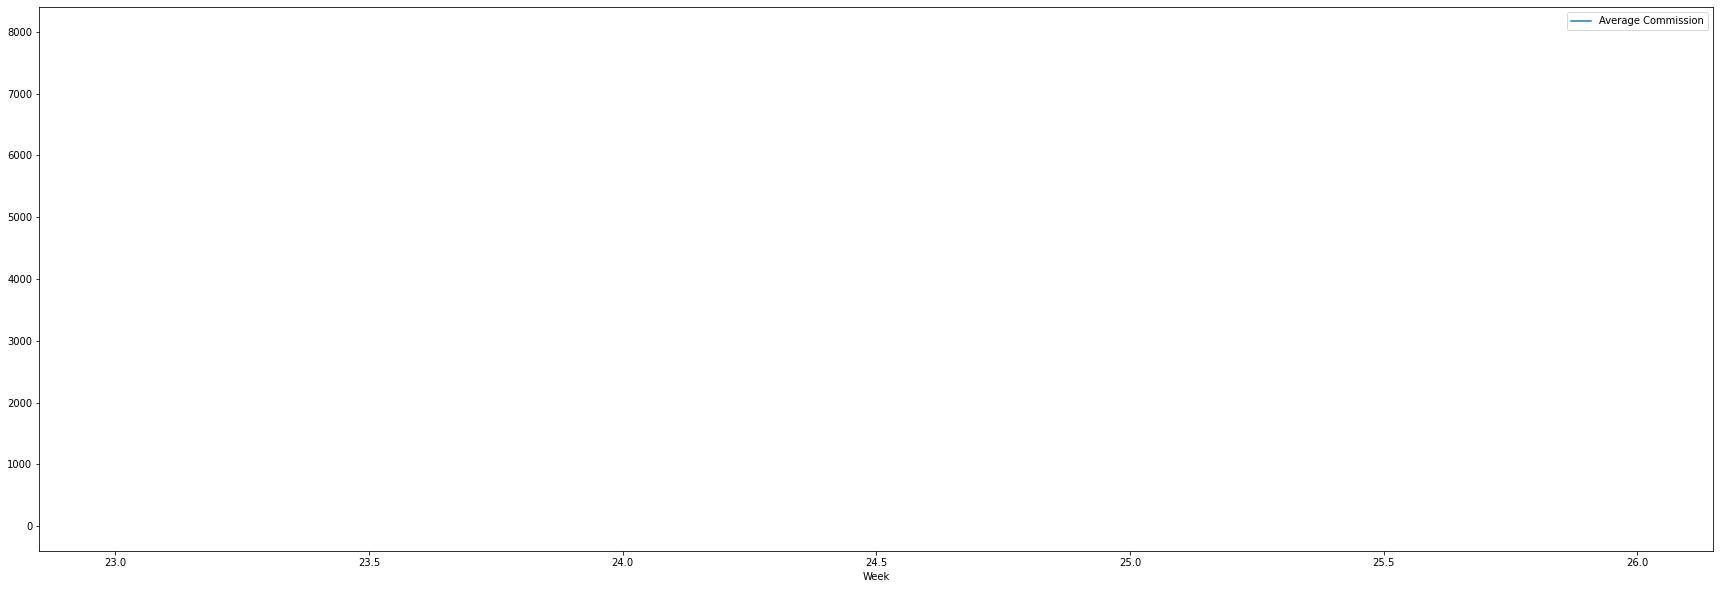

In [18]:
#getting the values for specific months
com_jun = com_mth[com_mth['Month']==6]
com_jun = com_jun.sort_values(by='Week')
com_jun = com_jun.drop(columns=['Month'])
com_jun

#getting the values for each week
wk1 = com_jun[com_jun['Week']==1]
wk1

wk2 = com_jun[com_jun['Week']==2]
wk2

wk3 = com_jun[com_jun['Week']==3]
wk3 

wk4 = com_jun[com_jun['Week']==4]
wk4


d = {'Week': [23, 24, 25, 26], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

junAvgComm = pd.DataFrame(data=d)
junAvgComm
junAvg_graph = junAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# SECOND QUARTER AVERAGE<a class="anchor" id="sqa"></a>

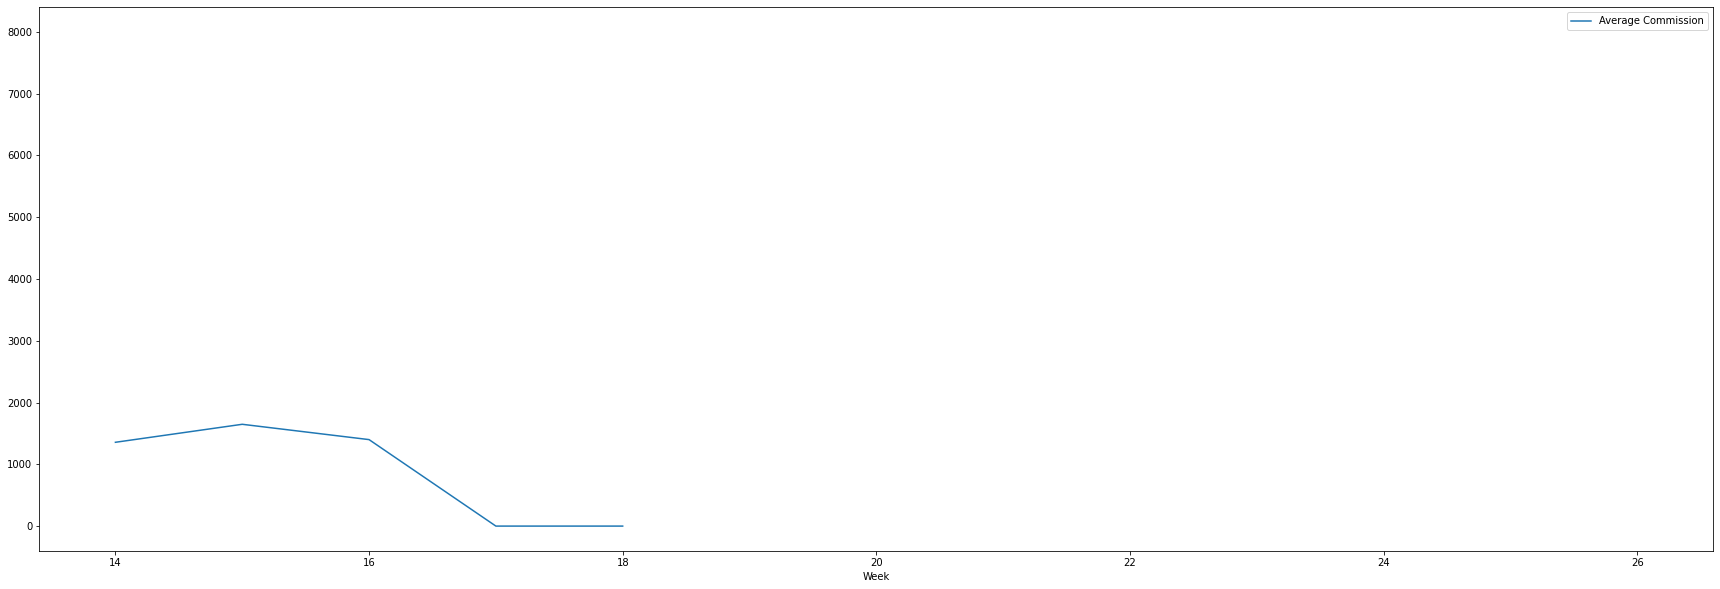

In [19]:
secondQuarter = [aprAvgComm, mayAvgComm, junAvgComm]

secondQ = pd.concat(secondQuarter)

secondQgraph = secondQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [20]:
# JULY <a class="anchor" id="jul"></a>

,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,Average Commission
0,27,NaN
1,28,NaN
2,29,NaN
3,30,NaN
4,31,NaN


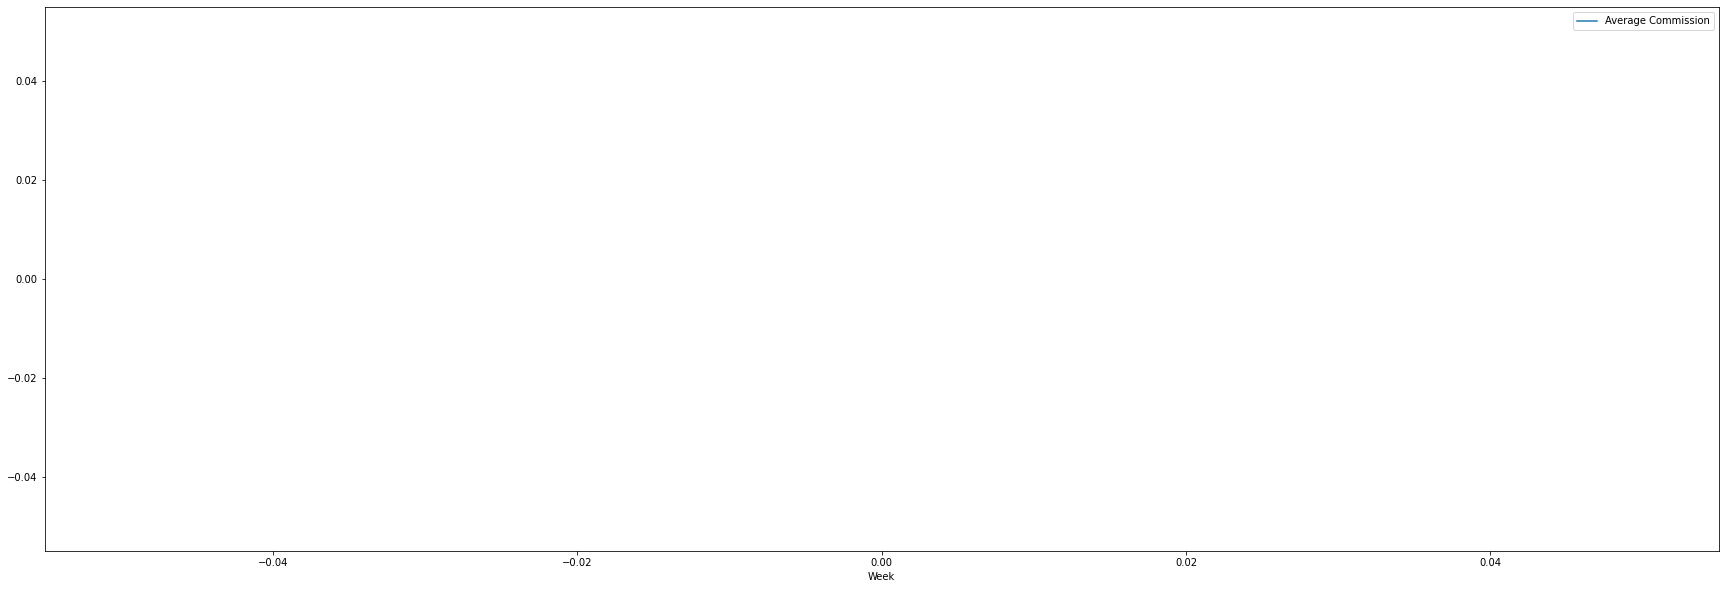

In [21]:
#getting the values for specific months
com_jul = com_mth[com_mth['Month']==7]
com_jul = com_jul.sort_values(by='Week')
com_jul = com_jul.drop(columns=['Month'])
com_jul

#getting the values for each week
wk1 = com_jul[com_jul['Week']==1]
wk1

wk2 = com_jul[com_jul['Week']==2]
wk2

wk3 = com_jul[com_jul['Week']==3]
wk3 

wk4 = com_jul[com_jul['Week']==4]
wk4

wk5 = com_jul[com_jul['Week']==5]
wk5

d = {'Week': [27, 28, 29, 30, 31], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

julAvgComm = pd.DataFrame(data=d)
julAvgComm
julAvg_graph = julAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# AUGUST  <a class="anchor" id="aug"></a>

,Week,fscName,Commision Earned
44,3,Jane Kisia,0.0
43,3,Rolly Achieng Otieno,0.0
45,4,Festus Kinyua,0.0
47,4,Roseline Syama,0.0
46,4,Purity Gatiria,0.0


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned
44,3,Jane Kisia,0.0
43,3,Rolly Achieng Otieno,0.0


,Week,fscName,Commision Earned
45,4,Festus Kinyua,0.0
47,4,Roseline Syama,0.0
46,4,Purity Gatiria,0.0


,Week,Average Commission
0,32,NaN
1,33,NaN
2,34,0.0
3,35,0.0


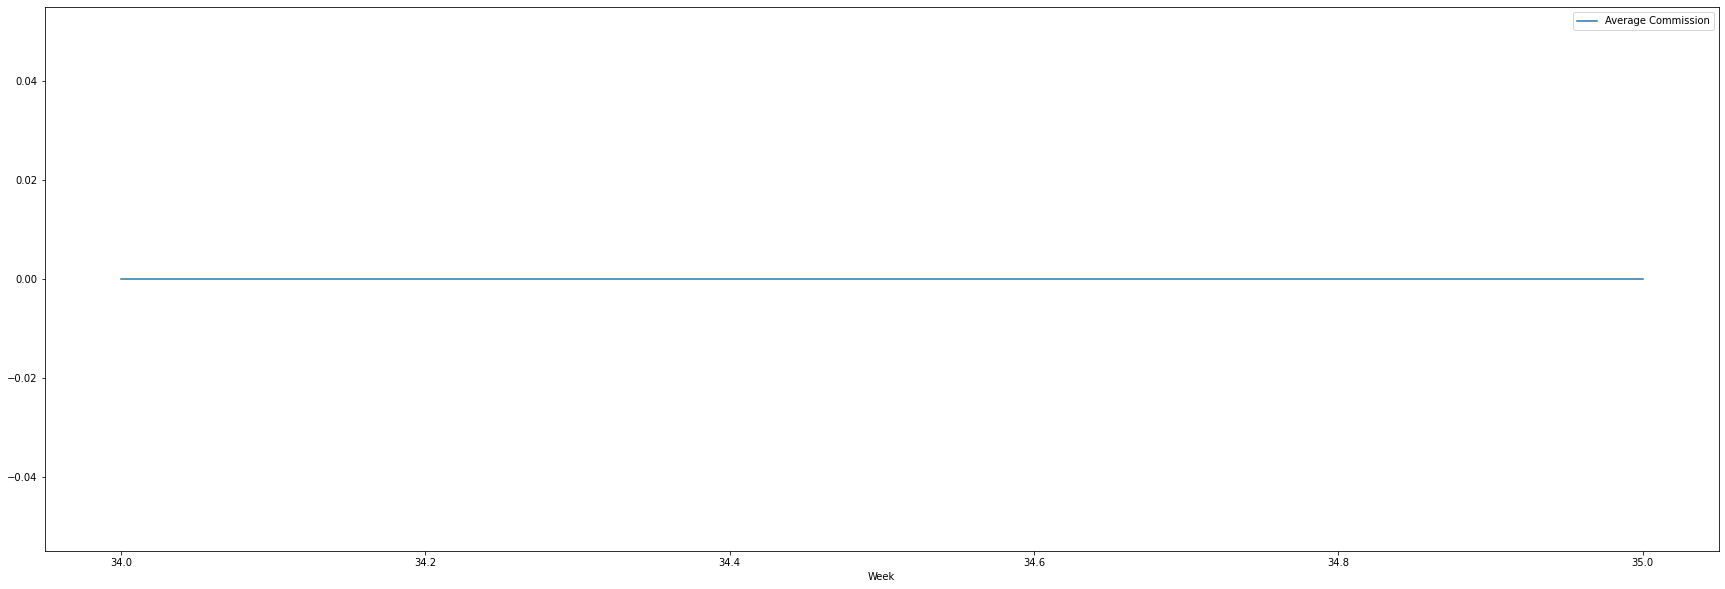

In [22]:
#getting the values for specific months
com_aug = com_mth[com_mth['Month']==8]
com_aug = com_aug.sort_values(by='Week')
com_aug = com_aug.drop(columns=['Month'])
com_aug

#getting the values for each week
wk1 = com_aug[com_aug['Week']==1]
wk1

wk2 = com_aug[com_aug['Week']==2]
wk2

wk3 = com_aug[com_aug['Week']==3]
wk3 

wk4 = com_aug[com_aug['Week']==4]
wk4


d = {'Week': [32, 33, 34, 35], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

augAvgComm = pd.DataFrame(data=d)
augAvgComm
augAvg_graph = augAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# SEPTEMBER <a class="anchor" id="sep"></a>

,Week,fscName,Commision Earned
48,1,Alex Macharia,6800.0
49,2,Lawrence Mukabane,0.0
50,3,Stella Muthee,0.0
52,3,Lucy Kaari,0.0
51,3,Morris Thiaine,0.0
55,3,John Koileken,0.0
53,3,Regina Muthoni,0.0
54,3,Titus Kimathi,0.0
56,3,Rufus Sirere Yenko,0.0
57,4,Jacob Muntet,0.0


,Week,fscName,Commision Earned
48,1,Alex Macharia,6800.0


,Week,fscName,Commision Earned
49,2,Lawrence Mukabane,0.0


,Week,fscName,Commision Earned
50,3,Stella Muthee,0.0
52,3,Lucy Kaari,0.0
51,3,Morris Thiaine,0.0
55,3,John Koileken,0.0
53,3,Regina Muthoni,0.0
54,3,Titus Kimathi,0.0
56,3,Rufus Sirere Yenko,0.0


,Week,fscName,Commision Earned
57,4,Jacob Muntet,0.0


,Week,fscName,Commision Earned


,Week,Average Commission
0,36,6800.0
1,37,0.0
2,38,0.0
3,39,0.0
4,40,NaN


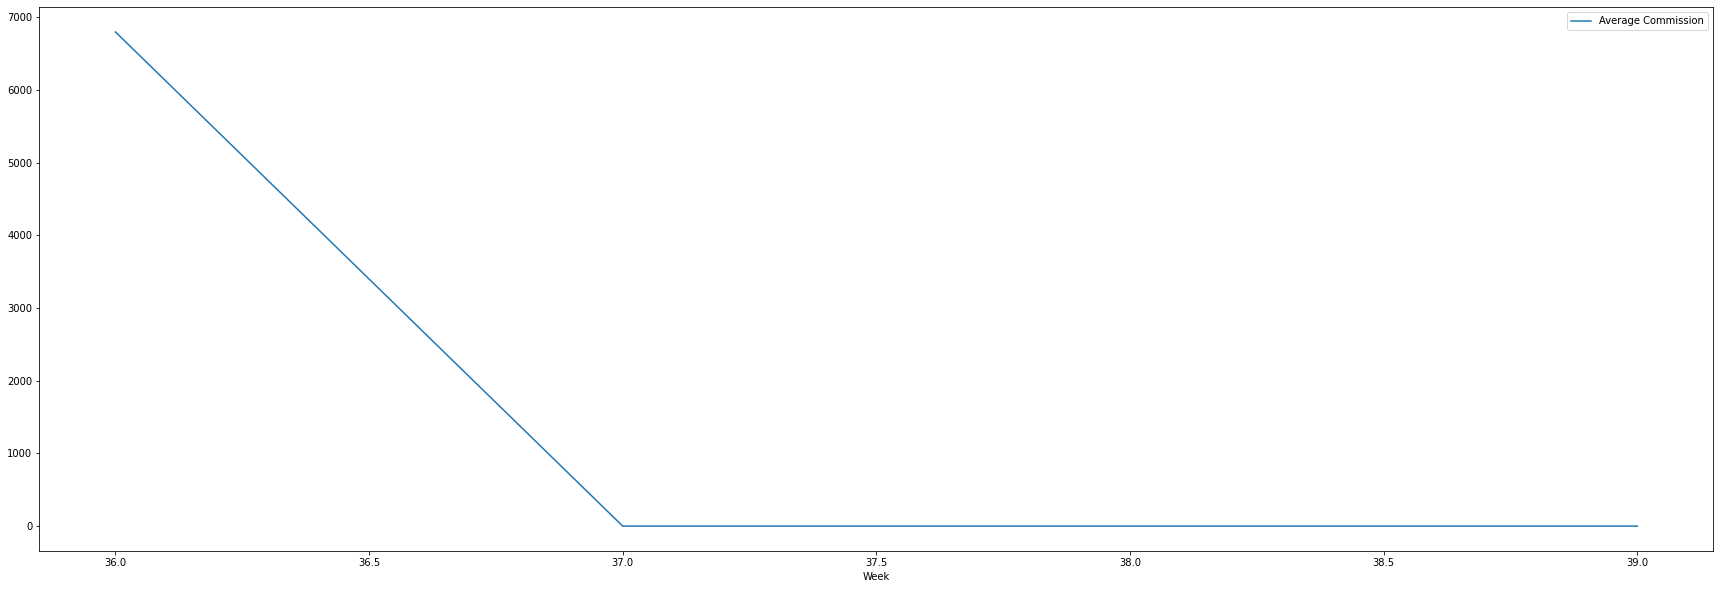

In [23]:
#getting the values for specific months
com_sep = com_mth[com_mth['Month']==9]
com_sep = com_sep.sort_values(by='Week')
com_sep = com_sep.drop(columns=['Month'])
com_sep

#getting the values for each week
wk1 = com_sep[com_sep['Week']==1]
wk1

wk2 = com_sep[com_sep['Week']==2]
wk2

wk3 = com_sep[com_sep['Week']==3]
wk3 

wk4 = com_sep[com_sep['Week']==4]
wk4

wk5 = com_sep[com_sep['Week']==5]
wk5

d = {'Week': [36, 37, 38, 39, 40], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

sepAvgComm = pd.DataFrame(data=d)
sepAvgComm
sepAvg_graph = sepAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# THIRD QUARTER AVERAGE<a class="anchor" id="tqa"></a>

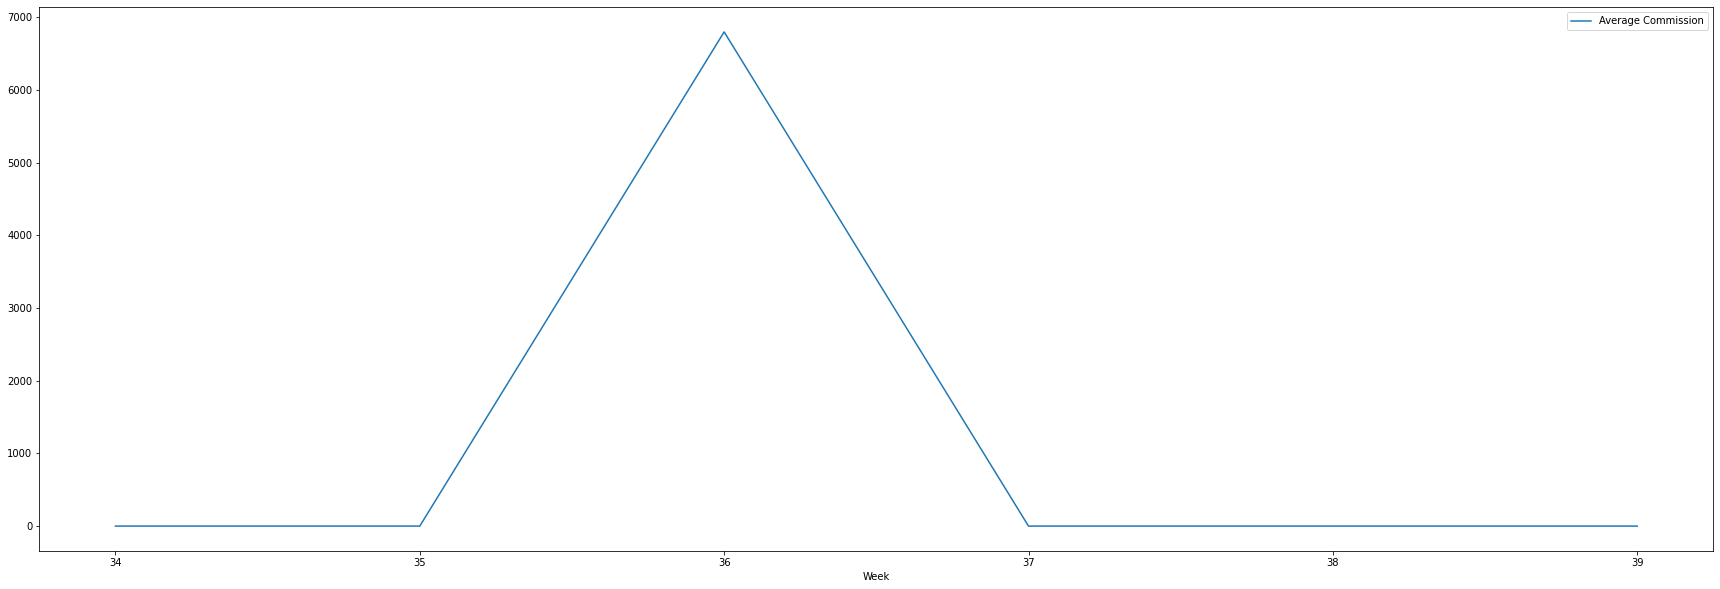

In [24]:
thirdQuarter = [julAvgComm, augAvgComm, sepAvgComm]

thirdQ = pd.concat(thirdQuarter)

thirdQgraph = thirdQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# OCTOBER <a class="anchor" id="oct"></a>

,Week,fscName,Commision Earned
58,2,Ayub Owiti,0.0
60,3,Rufus Sirere Yenko,0.0
59,3,Carren Sawo,0.0


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned
58,2,Ayub Owiti,0.0


,Week,fscName,Commision Earned
60,3,Rufus Sirere Yenko,0.0
59,3,Carren Sawo,0.0


,Week,fscName,Commision Earned


,Week,Average Commission
0,41,NaN
1,42,0.0
2,43,0.0
3,44,NaN


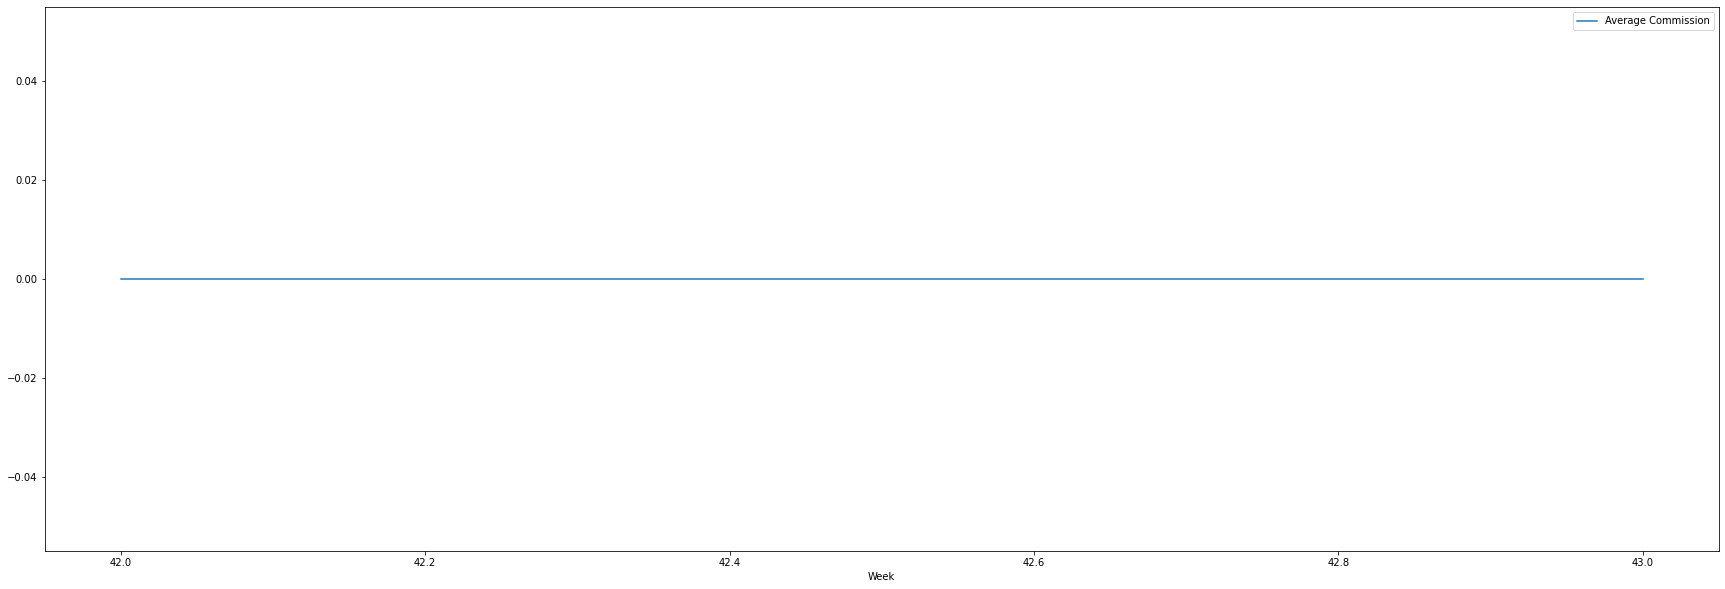

In [25]:
#getting the values for specific months
com_oct = com_mth[com_mth['Month']==10]
com_oct = com_oct.sort_values(by='Week')
com_oct = com_oct.drop(columns=['Month'])
com_oct

#getting the values for each week
wk1 = com_oct[com_oct['Week']==1]
wk1

wk2 = com_oct[com_oct['Week']==2]
wk2

wk3 = com_oct[com_oct['Week']==3]
wk3 

wk4 = com_oct[com_oct['Week']==4]
wk4


d = {'Week': [41, 42, 43, 44], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

octAvgComm = pd.DataFrame(data=d)
octAvgComm
octAvg_graph = octAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# NOVEMBER <a class="anchor" id="nov"></a>

,Week,fscName,Commision Earned
61,1,Benson Sanamwala,0.0
63,1,Rufus Sirere Yenko,0.0
62,1,Justus Naitutae,0.0
64,2,Timothy Wamuyu Kirruti,0.0
65,2,Rufus Sirere Yenko,0.0


,Week,fscName,Commision Earned
61,1,Benson Sanamwala,0.0
63,1,Rufus Sirere Yenko,0.0
62,1,Justus Naitutae,0.0


,Week,Average Commission
0,45,0.0


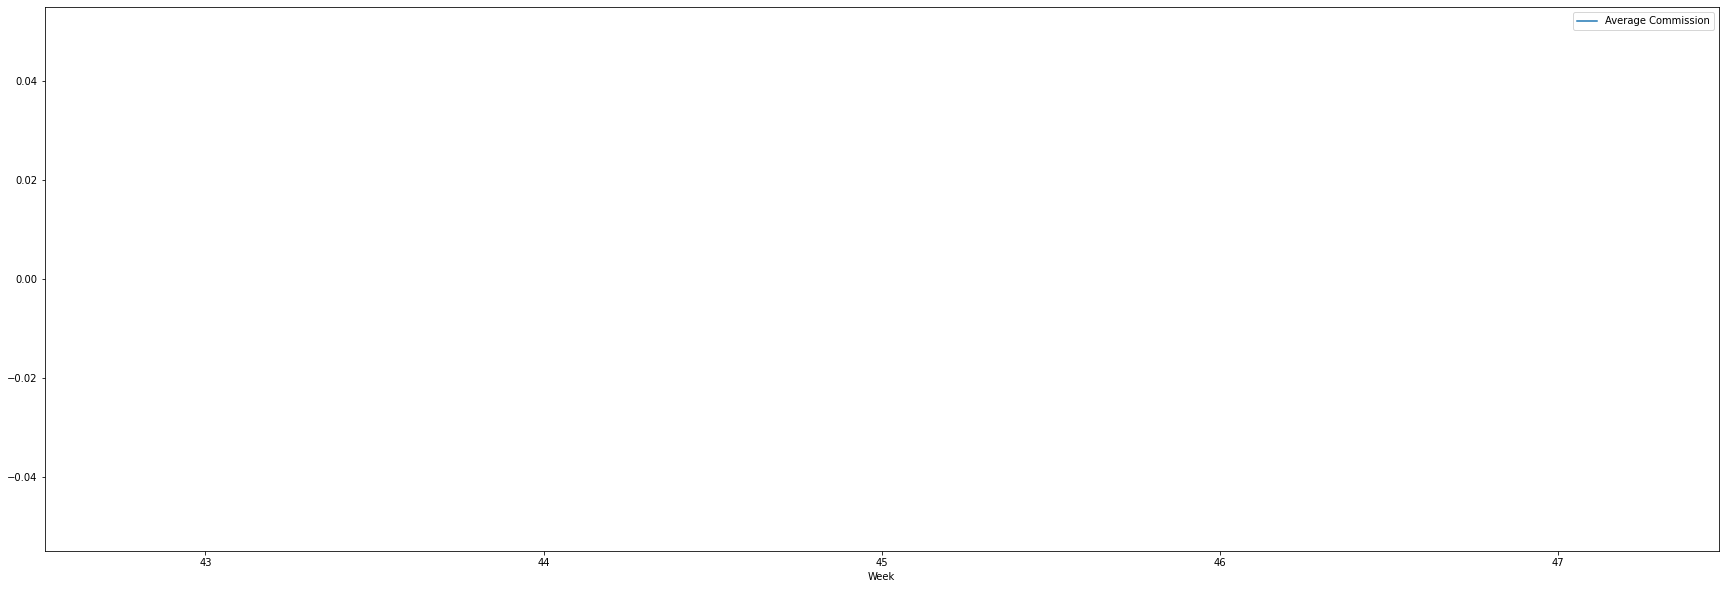

In [26]:
#getting the values for specific months
com_nov = com_mth[com_mth['Month']==11]
com_nov = com_nov.sort_values(by='Week')
com_nov = com_nov.drop(columns=['Month'])
com_nov

#getting the values for each week
wk1 = com_nov[com_nov['Week']==1]
wk1


d = {'Week': [45], 
     'Average Commission': [ wk1['Commision Earned'].mean()]}

novAvgComm = pd.DataFrame(data=d)
novAvgComm
novAvg_graph = novAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [27]:
# FINAL QUARTER AVERAGE<a class="anchor" id="fiqa"></a>

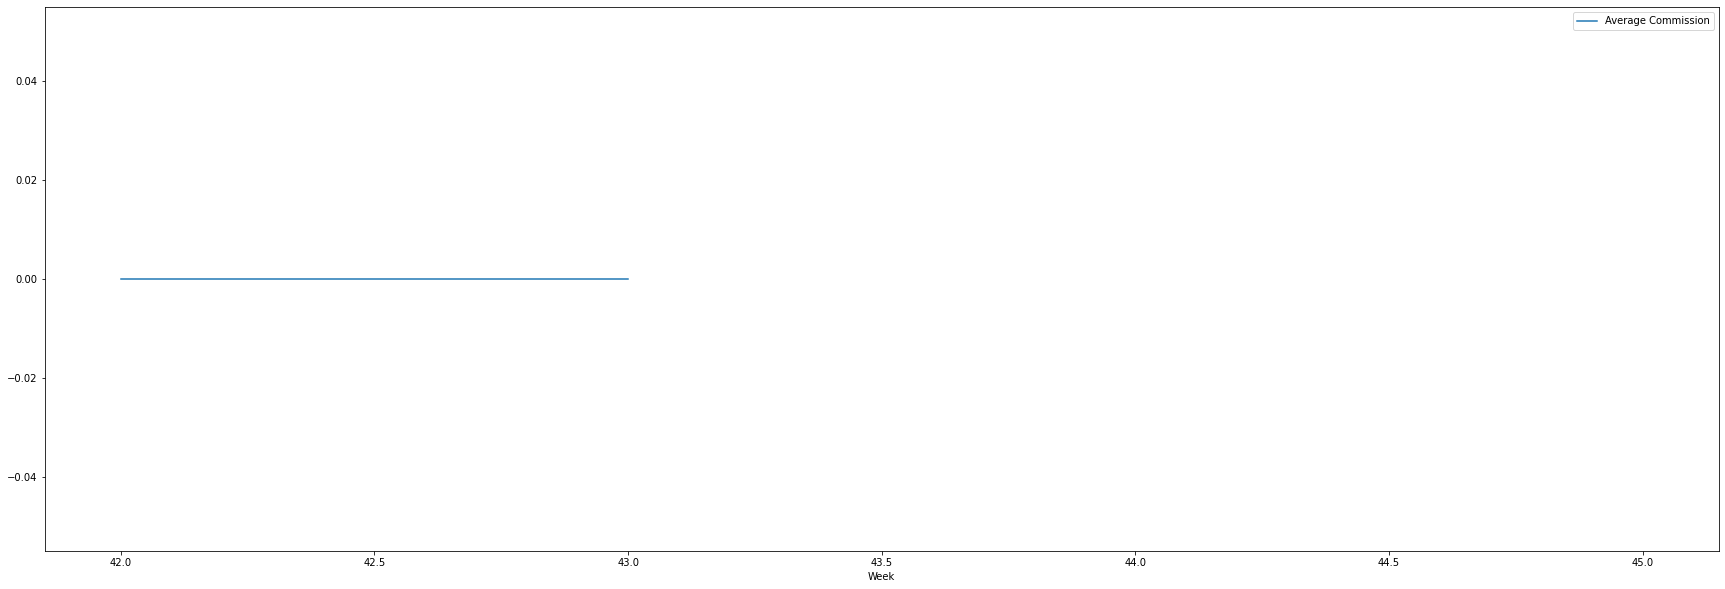

In [28]:
finQuarter = [octAvgComm, novAvgComm]

finQ = pd.concat(finQuarter)

finQgraph = finQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# FULL YEAR AVERAGE<a class="anchor" id="fya"></a>

,Week,Average Commission
0,1,NaN
1,2,NaN
2,3,NaN
3,4,18430.000000
4,5,NaN
0,6,NaN
1,7,NaN
2,8,0.000000
3,9,146.666667
0,10,2910.000000


,Week,Average Commission
0,1,0.000000
1,2,0.000000
2,3,0.000000
3,4,18430.000000
4,5,0.000000
0,6,0.000000
1,7,0.000000
2,8,0.000000
3,9,146.666667
0,10,2910.000000


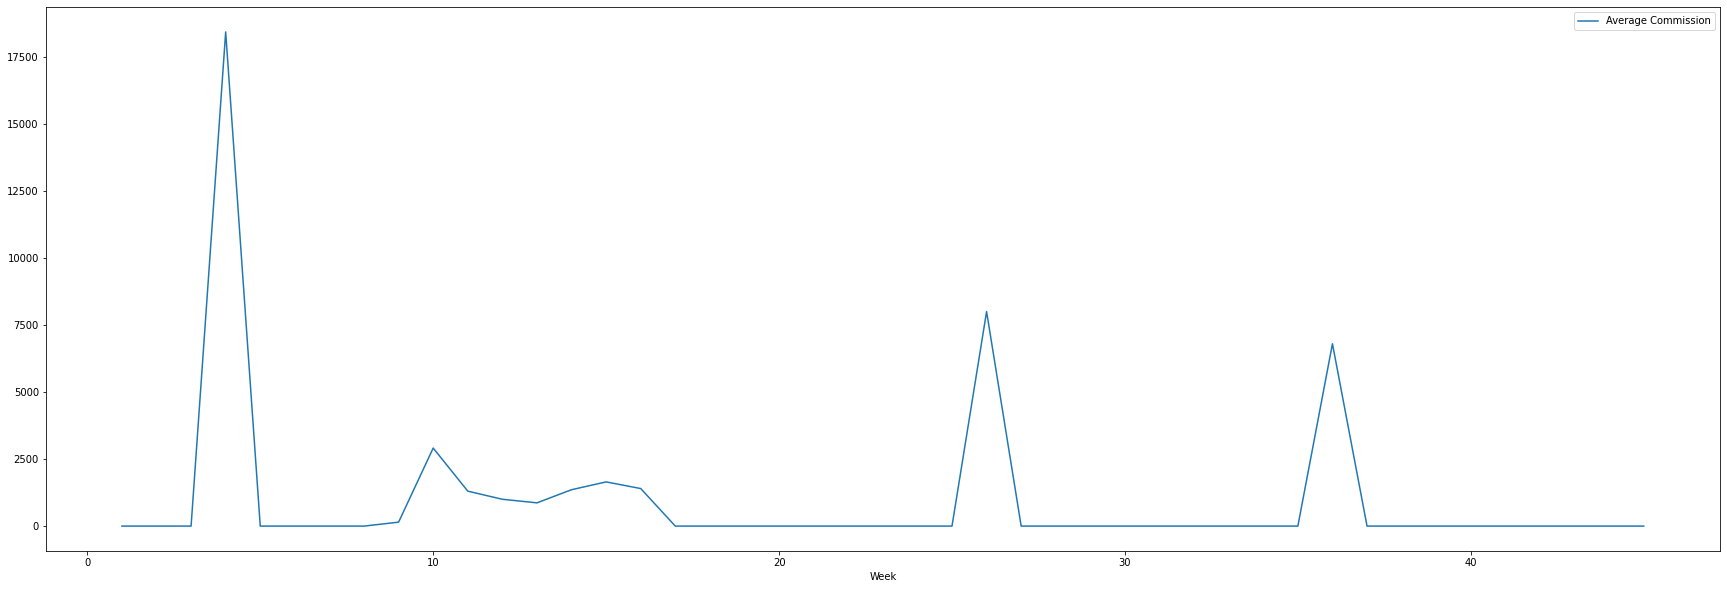

In [29]:
fya = pd.concat([janAvgComm, febAvgComm, marAvgComm, aprAvgComm, mayAvgComm, junAvgComm, julAvgComm, augAvgComm, sepAvgComm, octAvgComm, novAvgComm])
fya
fya = fya.fillna(0)
fya

fyaGraph = fya.plot.line(x='Week', y='Average Commission', figsize=(30,10))

<AxesSubplot:xlabel='Week', ylabel='Average Commission'>

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-5000., -2500.,     0.,  2500.,  5000.,  7500., 10000., 12500.,
        15000., 17500., 20000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

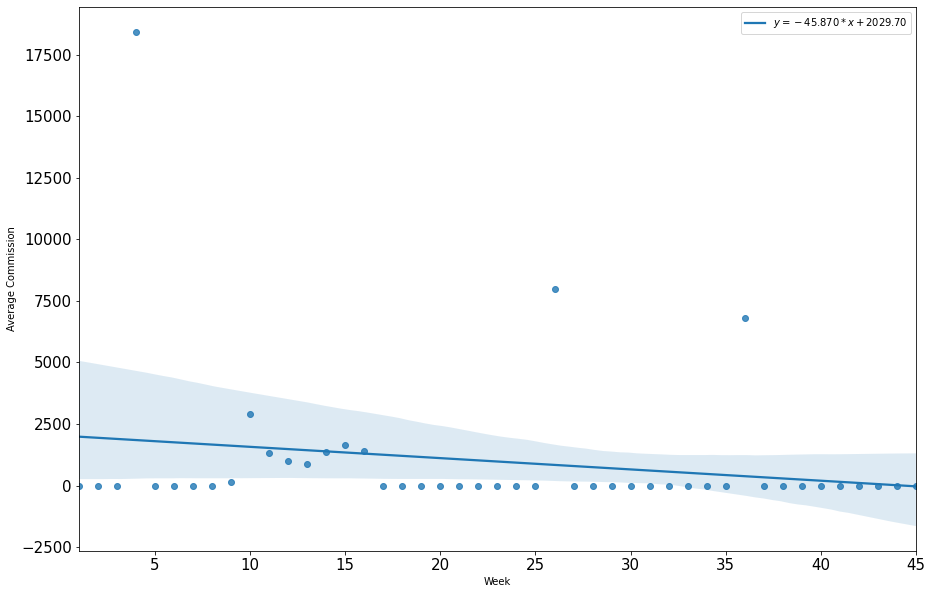

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
slope, intercept, r_value, pv, se = stats.linregress(fya['Week'], fya['Average Commission'])
sns.regplot(fya['Week'], fya['Average Commission'], line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
plt.xticks(fontsize=15)
plt.legend()
plt.yticks(fontsize=15)

In [31]:
fya

,Week,Average Commission
0,1,0.000000
1,2,0.000000
2,3,0.000000
3,4,18430.000000
4,5,0.000000
0,6,0.000000
1,7,0.000000
2,8,0.000000
3,9,146.666667
0,10,2910.000000


In [32]:
fya = fya[fya['Average Commission'] != 0]
fya

,Week,Average Commission
3,4,18430.000000
3,9,146.666667
0,10,2910.000000
1,11,1303.333333
2,12,1000.000000
3,13,866.666667
0,14,1356.666667
1,15,1648.000000
2,16,1400.000000
3,26,8000.000000


<AxesSubplot:xlabel='Week', ylabel='Average Commission'>

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-40000., -30000., -20000., -10000.,      0.,  10000.,  20000.,
         30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Average Commission earned by FSCs over the year (Finances)')

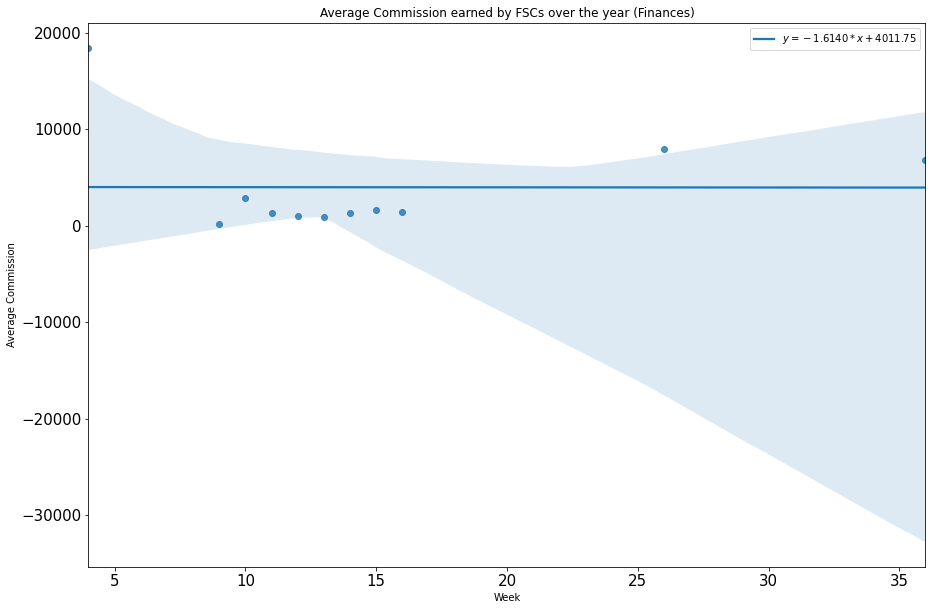

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
slope, intercept, r_value, pv, se = stats.linregress(fya['Week'], fya['Average Commission'])
sns.regplot(fya['Week'], fya['Average Commission'], line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
plt.xticks(fontsize=15)
plt.legend()
plt.yticks(fontsize=15)
plt.title("Average Commission earned by FSCs over the year (Finances)")